# TITANIC Dataset 

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\titanic.csv")
df

In [151]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<Axes: >

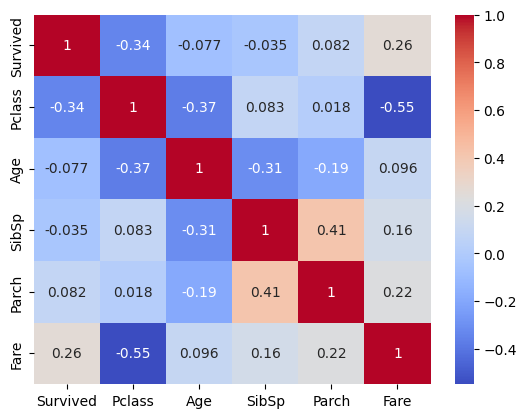

In [154]:
#Plotting a heat map for only numeric values
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [155]:
#Checking for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

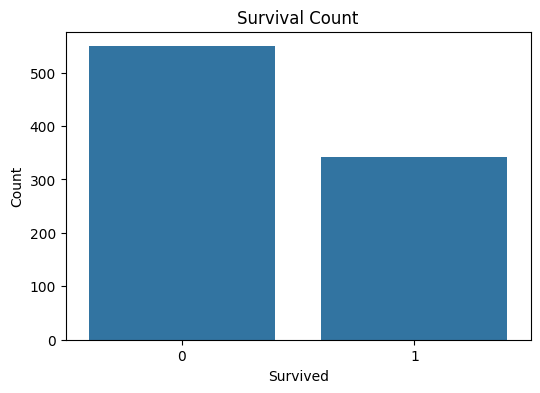

In [156]:
# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

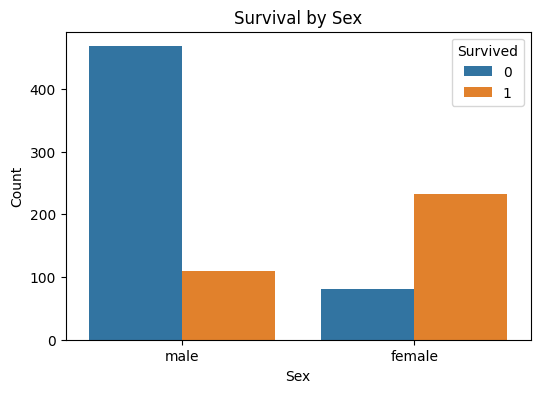

In [157]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


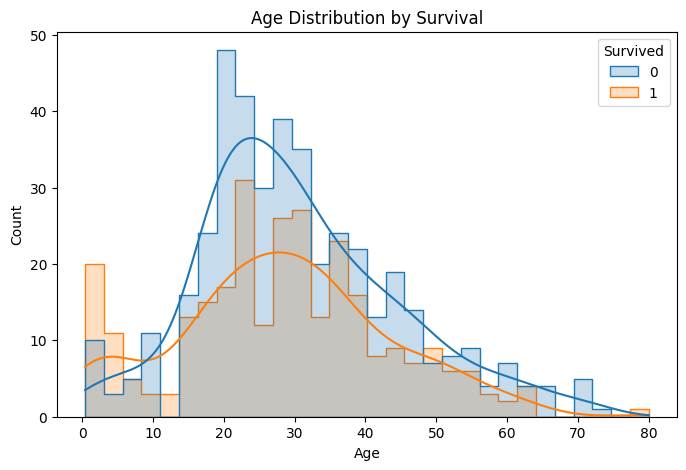

In [158]:
# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

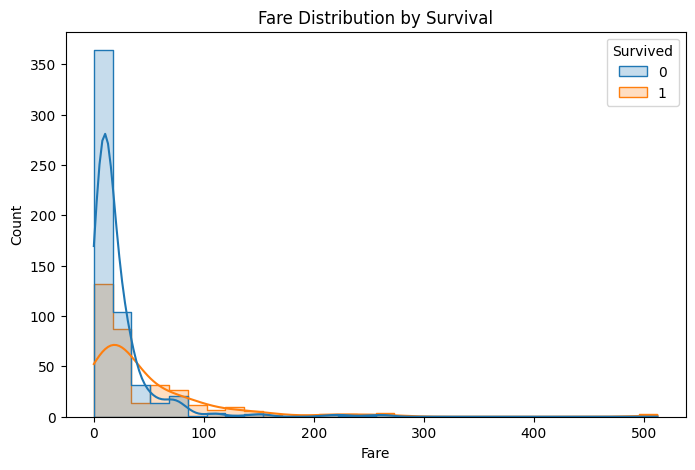

In [159]:
# Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True, element='step')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [160]:
#replacing the 177 missing values in the Age column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\adity\AppData\Local\Temp\ipykernel_15860\4277392808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [161]:
#Also replacing the 2 Embarked missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\adity\AppData\Local\Temp\ipykernel_15860\3309900381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [162]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Age'>

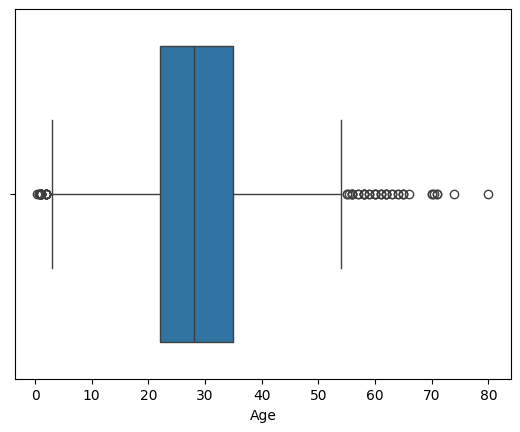

In [163]:
#Boxplot for detecting Outliers
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Fare'>

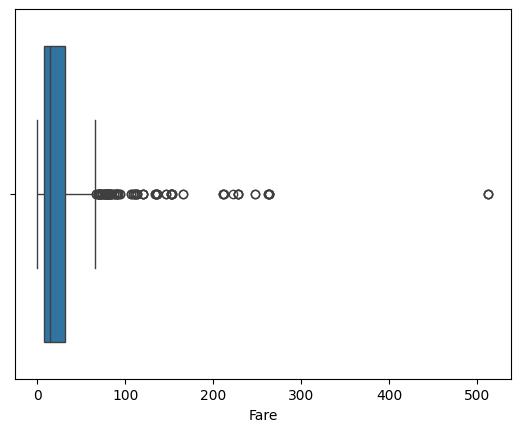

In [164]:
sns.boxplot(data=df, x='Fare')

In [165]:
#Handling the Outliers

# For Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
df['Age'] = np.where(df['Age'] < lower_age, lower_age, df['Age'])
df['Age'] = np.where(df['Age'] > upper_age, upper_age, df['Age'])

# For Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare
df['Fare'] = np.where(df['Fare'] < lower_fare, lower_fare, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_fare, upper_fare, df['Fare'])

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split on scaled data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [167]:
from sklearn.svm import SVC

In [168]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# SVC Classifier
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

KNN Accuracy: 0.8100558659217877
KNN Confusion Matrix:
 [[91 14]
 [20 54]]
SVC Accuracy: 0.8156424581005587
SVC Confusion Matrix:
 [[93 12]
 [21 53]]


In [169]:
# Fine tuning KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(x_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
best_knn = knn_grid.best_estimator_
y_pred_knn_tuned = best_knn.predict(x_test)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("Tuned KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_tuned))

# Fine tuning SVC using GridSearchCV
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
svc_grid.fit(x_train, y_train)
print("Best SVC parameters:", svc_grid.best_params_)
best_svc = svc_grid.best_estimator_
y_pred_svc_tuned = best_svc.predict(x_test)
print("Tuned SVC Accuracy:", accuracy_score(y_test, y_pred_svc_tuned))
print("Tuned SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc_tuned))

Best KNN parameters: {'n_neighbors': 19}
Tuned KNN Accuracy: 0.8212290502793296
Tuned KNN Confusion Matrix:
 [[94 11]
 [21 53]]
Best SVC parameters: {'C': 1, 'kernel': 'rbf'}
Tuned SVC Accuracy: 0.8156424581005587
Tuned SVC Confusion Matrix:
 [[93 12]
 [21 53]]
Best SVC parameters: {'C': 1, 'kernel': 'rbf'}
Tuned SVC Accuracy: 0.8156424581005587
Tuned SVC Confusion Matrix:
 [[93 12]
 [21 53]]
